<a href="https://colab.research.google.com/github/ENEE439d-TEXTML/TextML/blob/master/data2_citation_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb
import pandas as pd
import numpy as np
from keras.layers import LSTM, Activation, Dropout, Dense, Input
from keras.layers.embeddings import Embedding
from keras.models import Model
import string
import re
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
address = "/content/drive/MyDrive/Maryland/4 Spring/ENEE439D/Text-ML/preprocess_results/Jie_Tang_1_Article_All_Part00000.csv"
oldnum = "00000"
#list of csv numbers in drive
numbers = range(40000,40801)

reference_list = []
frequency_list = []
cite_list = []
context_list = []
num_paper_list = [] #what paper was a given citation in 
num_line_list = [] #what row a citation was in

global_reference_total_cites={}
titles={} #dictionary to hold title of paper and all papers they cite


for number in numbers:
  repeat_flag = False
  number = str(number)
  address = address.replace(oldnum, number)
  oldnum = number
  #read in csv
  data2  = pd.read_csv(address, header=None)
  #print(address)


  #extract columns
  column0 = data2[0] #title data
  column1 = data2[1] #section data
  sentencedata2 = data2[2] #actual sentences

# The following section is used to extract the number of papers that are referenced in an article and to store the title names in a dictionary
  y = 0
  for x in column0:
    if x == 'title':
      title = column1[y].lower() #find name of THIS article
      if title in titles: #if this is a repeat article -> move on to next csv
        repeat_flag = True
        break
      titles[title] = [] #find title of paper and store in dictionary. value is list of other papers this paper references
    if x == 'references': #find where the number of references are listed
      break
    y = y+1 #increment iterator
  if repeat_flag == True: #if this is a repeat article -> move on to next csv
    continue
  num_references = column1[y] #references = column1[column0 == 'references']

  z = 0
  references = []

  #store the list of references for each article
  while z < int(num_references):
    z = z + 1
    ref = column1[y+z] #find reference in bibliography
    splitter = "\"" #
    if isinstance(ref, str) == False: #some data is just empty and isn't in string format
      ref = 'NULL'
    split_ref = ref.split(splitter, 3) #find TITLE of article within full reference
    if len(split_ref) == 3: #sometime the references just aren't in reference format at all.
      ref = split_ref[1] #second "chunk" holds title

    ref = ref.strip()
    ref = ref.lower()
    references.append(ref)

    if ref not in titles[title]: #add each reference to the title graph
       titles[title].append(ref)
    





  #create array that is length of number of references in order to keep track of how many times referenced
  frequency = np.zeros(int(num_references)) 


  notempty = sentencedata2.notna() #find nonempty sentences
  sentencedata2=sentencedata2[notempty].reset_index(drop=True) 
  
  
  citations = []
  num_lines= []
  num_papers= []
  contexts = []

  i = 0
  for sentence in sentencedata2:
    
    matches = re.findall("\[\d+\]",sentence) # find [#]
    if  matches: # if ANY reference is found

      
      #increment frequency array at given spot based on reference found
      for match in matches: #in case of two citations in one sentence
        match = int(match.strip("[]")) 
        if match > len(frequency): #Some papers (like 40022) reference a paper not listed in references (ie reference paper 19 when paper only lists 15 papers)
          continue
        frequency[match-1] += 1
        context = ""
        for j in range(i-2,i+2):
          if (j <= len(sentencedata2) -1 and j >= 0): #Make sure context is within bounds of paper (in case sentence of note is near start or end)
            context = context + sentencedata2[j]
        contexts.append(context)

      #store sentence in list
      citations.append(sentence)
      num_lines.append(i)
      num_papers.append(number)
    i = i+1

  #print(citations)
  #print(references)
  #print(frequency)
  #print(contexts)

  #turning my two parallel arrays/lists into one dictionary where the key is the reference and the value is the frequency within a given paper
  freq_dic = {references[i]: frequency[i] for i in range(len(frequency))} 


#this is creating a global dictionary (ie across all 801 articles) of references and their overall frequency
  for ref,freq in freq_dic.items():
    if ref in global_reference_total_cites: #if the reference is already listed in the dictionary
      global_reference_total_cites[ref] += freq #add this articles frequency to the count
    else:
      global_reference_total_cites[ref] = freq #otherwise add this entry as a new entry and set its initial frequency to its local count
  
  
  #store list in list
  cite_list.append(citations)
  num_line_list.append(num_lines)
  num_paper_list.append(num_papers)
  reference_list.append(references)
  context_list.append(contexts)
  frequency_list.append(freq_dic) #this is a list of the frequency dictionaries
  



#cite_list
#context_list


In [ ]:
cite_list[0][0]


'With the data collected from the entire network, the sensor network supports a variety of applications, including security surveillance [1], [2], [3], localization [4], information enquiry, and transmission [5], [6], [7], [8], etc. In this paper, we consider the ubiquitous data collection by mobile users in the wireless sensor network.'

In [ ]:
context_list[0][0]

'Pastseveral years have witnessed a great success of Wireless Sensor Networks (WSNs).Recent advances in Wireless Sensor Network technologies provide people the ability to better understand the physical world.With the data collected from the entire network, the sensor network supports a variety of applications, including security surveillance [1], [2], [3], localization [4], information enquiry, and transmission [5], [6], [7], [8], etc. In this paper, we consider the ubiquitous data collection by mobile users in the wireless sensor network.Mobile users are equipped with handheld devices that communicate with sensor nodes and instantly access the network through nearby sensors.'

In [ ]:
reference_list[0][0]

'a spatiotemporal communication protocol for wireless sensor networks'

In [ ]:
frequency_list[0]['a spatiotemporal communication protocol for wireless sensor networks']

1.0

In [ ]:
print(len(titles['exploiting ubiquitous data collection for mobile users in wireless sensor networks']))
titles['exploiting ubiquitous data collection for mobile users in wireless sensor networks']

29


['a spatiotemporal communication protocol for wireless sensor networks',
 'navigability and reachability index for emergency navigation systems using wireless sensor networks',
 'probabilistic approach to provisioning guaranteed qos for distributed event detection',
 'localized network layer protocols in wireless sensor networks based on optimizing cost over progress ratio',
 'the dynamic bloom filters',
 'a reliability-oriented transmission service in wireless sensor networks',
 'efficient and fast distributed top-k query protocol in wireless sensor networks',
 'loop-free hybrid single-path/flooding routing algorithms with guaranteed delivery for wireless networks',
 'does wireless sensor network scale? a measurement study on greenorbs',
 'collection tree protocol',
 'idea: integrated distributed energy awareness for sensor networks',
 'composable information gradients in wireless sensor networks',
 's4: small state and small stretch compact routing protocol for large static wireless 

In [ ]:
global_reference_num_papers_cite = {}



for references in reference_list:
  for ref in references:
    if ref not in global_reference_num_papers_cite:
      global_reference_num_papers_cite[ref]=1
    else:
      global_reference_num_papers_cite[ref]+=1

print(max(global_reference_num_papers_cite.values()))





38


In [ ]:
import networkx as nx
DG = nx.DiGraph(titles)

In [ ]:
DG.number_of_nodes()


20357

In [ ]:
DG.number_of_edges()

23890

In [ ]:
DG.out_edges(['exploiting ubiquitous data collection for mobile users in wireless sensor networks'])

OutEdgeDataView([('exploiting ubiquitous data collection for mobile users in wireless sensor networks', 'a spatiotemporal communication protocol for wireless sensor networks'), ('exploiting ubiquitous data collection for mobile users in wireless sensor networks', 'navigability and reachability index for emergency navigation systems using wireless sensor networks'), ('exploiting ubiquitous data collection for mobile users in wireless sensor networks', 'probabilistic approach to provisioning guaranteed qos for distributed event detection'), ('exploiting ubiquitous data collection for mobile users in wireless sensor networks', 'localized network layer protocols in wireless sensor networks based on optimizing cost over progress ratio'), ('exploiting ubiquitous data collection for mobile users in wireless sensor networks', 'the dynamic bloom filters'), ('exploiting ubiquitous data collection for mobile users in wireless sensor networks', 'a reliability-oriented transmission service in wirel

In [ ]:
len(DG.in_edges(['a spatiotemporal communication protocol for wireless sensor networks']))

1

In [ ]:
title_subset = {key: value for key, value in titles.items() if len(DG.in_edges([key])) > 12}

In [ ]:
title_subset

{'a topic modeling approach and its integration into the random walk framework for academic search': ['c. andrieu, n. de freitas, a. doucet, and m. i. jordan. an introduction to mcmc for machine learning. machine learning, 50:5-43, 2003.',
  'r. baeza-yates and b. ribeiro-neto. modern information retrieval. acm press, 1999.',
  'd. m. blei, a. y. ng, and m. i. jordan. latent dirichlet allocation. journal of machine learning research, 3:993-1022, 2003.',
  "c. buckley and e. m. voorhees. retrieval evaluation with incomplete information. in proc. of sigir'04, pages 25-32.",
  'm. hertzum and a. m. pejtersen. the information-seeking practices of engineers: searching for documents as well as for people. information processing & management, 36(5):761-778, 2000.',
  "t. hofmann. probabilistic latent semantic indexing. in proc. of sigir'99, pages 50-57, 1999.",
  'j. m. kleinberg. authoritative sources in a hyperlinked environment. journal of the acm, 46(5):604-632, 1999.',
  't. minka. estim

In [ ]:
DG_subset = nx.DiGraph(title_subset)
DG_subset.number_of_nodes()

32

In [ ]:
DG_subset

In [ ]:
sorted(DG.in_degree, key=lambda x: x[1], reverse=True)


[('a spatiotemporal communication protocol for wireless sensor networks', 1),
 ('navigability and reachability index for emergency navigation systems using wireless sensor networks',
  1),
 ('probabilistic approach to provisioning guaranteed qos for distributed event detection',
  1),
 ('localized network layer protocols in wireless sensor networks based on optimizing cost over progress ratio',
  1),
 ('the dynamic bloom filters', 1),
 ('a reliability-oriented transmission service in wireless sensor networks',
  1),
 ('efficient and fast distributed top-k query protocol in wireless sensor networks',
  1),
 ('loop-free hybrid single-path/flooding routing algorithms with guaranteed delivery for wireless networks',
  1),
 ('does wireless sensor network scale? a measurement study on greenorbs', 1),
 ('collection tree protocol', 1),
 ('idea: integrated distributed energy awareness for sensor networks', 1),
 ('composable information gradients in wireless sensor networks', 1),
 ('s4: small st

In [ ]:
sorted(DG.out_degree, key=lambda x: x[1], reverse=True)

[('behavior analysis for electronic commerce trading systems: a survey', 391),
 ('decision-theoretic distributed channel selection for opportunistic spectrum access: strategies, challenges and solutions',
  189),
 ('matching algorithms: fundamentals, applications and challenges', 178),
 ('a survey on machine-learning techniques in cognitive radios', 174),
 ('security and privacy of smart cities: a survey, research issues and challenges',
  161),
 ('from scaling disparities to integrated parallelism: a decathlon for a decade',
  153),
 ('survey and evaluation of space division multiplexing: from technologies to optical networks',
  149),
 ('privacy preservation in big data from the communication perspective—a survey',
  146),
 ('big scholarly data: a survey', 142),
 ('model checking based web service verification: a systematic literature review',
  138),
 ('connectivity weakness impacts on coordination in wireless sensor and actor networks',
  121),
 ('influence maximization on social g

In [ ]:
global_reference_num_papers_cite["downlink interference alignment"]

15

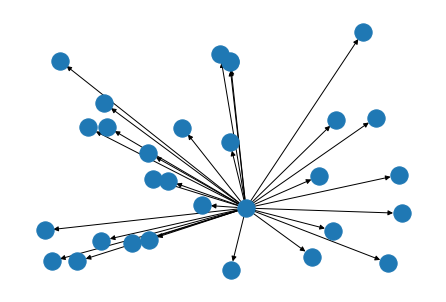

In [ ]:
import matplotlib.pyplot as plt
plt.clf
nx.draw_random(DG, with_labels=False)
plt.savefig("filename2.png") 

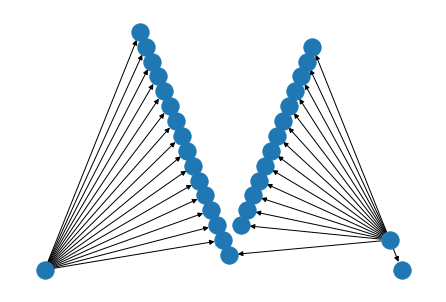

In [ ]:
import matplotlib.pyplot as plt
plt.clf
nx.draw_planar(DG_subset, with_labels=False)
plt.savefig("filename3.png") 

In [ ]:
for title in titles:
  if "influence maximization in dynamic social networks" in titles[title]:
    print(x)
    print(title)

information diffusion predictive model using radiation transfer
a multi-agent solution to maximizing product adoption in dynamic social networks
influence based analysis of community consistency in dynamic networks
diffusion models and approaches for influence maximization in social networks
vote-and-comment: modeling the coevolution of user interactions in social voting web sites
on the effectiveness of random jumps in an influence maximization algorithm for unknown graphs
a new viral marketing strategy with the competition in the large-scale online social networks
personalized influential topic search via social network summarization
influential node tracking on dynamic social network: an interchange greedy approach
seed set selection in evolving social networks
influence maximization problem for unknown social networks
influence maximization on social graphs: a survey
influence maximization in evolving multi-campaign environments
steering top-k influencers in dynamic graphs via loca